In [134]:
from IPython.display import display
from numpy.random import RandomState
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, precision_recall_fscore_support, roc_auc_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler


import numpy as np
import pandas as pd

In [135]:
rs = RandomState(121)

# PLANING AND UNDERSTANDING THE DATA

In [136]:
X = pd.read_csv("term-deposit-marketing-2020.csv")

In [137]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,married,tertiary,no,395,no,no,cellular,3,jun,107,1,no
39996,30,management,single,tertiary,no,3340,no,no,cellular,3,jun,238,3,yes
39997,54,admin,divorced,secondary,no,200,no,no,cellular,3,jun,170,1,yes
39998,34,management,married,tertiary,no,1047,no,no,cellular,3,jun,342,1,no


In [138]:
X.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [139]:
X["job"].unique()


array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [140]:
X["marital"].unique()
X["marital"] = X["marital"].map({"married":1, "single":0, "divorced":0})
X["marital"] = X["marital"].astype(int)

In [141]:
X["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [142]:
X["default"].unique()
X["default"] = X["default"].map({"yes":1, "no":0})
X["default"] = X["default"].astype(int)

In [143]:
X["housing"].unique()
X["housing"] = X["housing"].map({"yes":1, "no":0})
X["housing"] = X["housing"].astype(int)

In [144]:
X["loan"].unique()
X["loan"] = X["loan"].map({"yes":1, "no":0})
X["loan"] = X["loan"].astype(int)

In [145]:
X["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [146]:
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,1,tertiary,0,2143,1,0,unknown,5,may,261,1,no
1,44,technician,0,secondary,0,29,1,0,unknown,5,may,151,1,no
2,33,entrepreneur,1,secondary,0,2,1,1,unknown,5,may,76,1,no
3,47,blue-collar,1,unknown,0,1506,1,0,unknown,5,may,92,1,no
4,33,unknown,0,unknown,0,1,0,0,unknown,5,may,198,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,technician,1,tertiary,0,395,0,0,cellular,3,jun,107,1,no
39996,30,management,0,tertiary,0,3340,0,0,cellular,3,jun,238,3,yes
39997,54,admin,0,secondary,0,200,0,0,cellular,3,jun,170,1,yes
39998,34,management,1,tertiary,0,1047,0,0,cellular,3,jun,342,1,no


In [147]:
X_encode = pd.get_dummies(X, columns=['job','education','contact'],prefix_sep="_")

In [148]:
X_encode

,age,marital,default,balance,housing,loan,day,month,duration,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,1,0,2143,1,0,5,may,261,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,0,29,1,0,5,may,151,1,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,5,may,76,1,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,47,1,0,1506,1,0,5,may,92,1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,0,1,0,0,5,may,198,1,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,1,0,395,0,0,3,jun,107,1,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
39996,30,0,0,3340,0,0,3,jun,238,3,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
39997,54,0,0,200,0,0,3,jun,170,1,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
39998,34,1,0,1047,0,0,3,jun,342,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [149]:
X_encode.drop("month", axis=1, inplace=True)

In [150]:
X_encode.drop("day", axis=1, inplace=True)

In [151]:
X_encode.drop("duration", axis=1, inplace=True)

In [152]:
X_encode

,age,marital,default,balance,housing,loan,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,1,0,2143,1,0,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,0,0,29,1,0,1,no,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
2,33,1,0,2,1,1,1,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,47,1,0,1506,1,0,1,no,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,33,0,0,1,0,0,1,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,53,1,0,395,0,0,1,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0
39996,30,0,0,3340,0,0,3,yes,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
39997,54,0,0,200,0,0,1,yes,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
39998,34,1,0,1047,0,0,1,no,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [153]:
y= X_encode["y"].copy()
X_encode.drop("y", axis=1, inplace=True)

In [154]:
y

0         no
1         no
2         no
3         no
4         no
        ... 
39995     no
39996    yes
39997    yes
39998     no
39999     no
Name: y, Length: 40000, dtype: object

In [155]:
X_encode.age = X_encode.age.astype(float)
X_encode.campaign = X_encode.campaign.astype(float)
X_encode.balance = X_encode.balance.astype(float)


In [156]:
X_encode.shape

(40000, 26)

In [157]:
y.shape

(40000,)

# HAZIRLIK


In [158]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.svm import SVC
import time
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X_encode, y, test_size = 0.20, random_state=41)

# Random Forest

In [160]:
model=RandomForestClassifier().fit(X_train,y_train)

In [161]:
preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

[[7311   80]
 [ 596   13]]
              precision    recall  f1-score   support

          no       0.92      0.99      0.96      7391
         yes       0.14      0.02      0.04       609

    accuracy                           0.92      8000
   macro avg       0.53      0.51      0.50      8000
weighted avg       0.86      0.92      0.89      8000



## Important Features

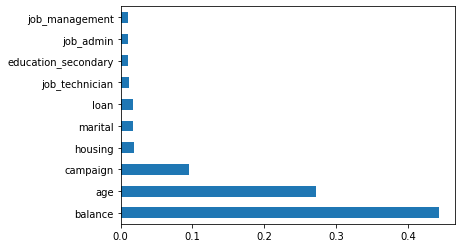

In [162]:


feature_imp = pd.Series(model.feature_importances_, index= X_encode.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [163]:
best_feat = feature_imp.nlargest(6).index.to_list()

X_reduced = X_encode[feature_imp.nlargest(6).index]
Xr_scaled = StandardScaler().fit_transform(X_reduced)

Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size = 0.30, 
                                                        random_state = 41)

start = time.process_time()
model=RandomForestClassifier().fit(X_train,y_train)
print(time.process_time() - start)

preds = model.predict(X_test)

print(confusion_matrix(y_test, preds))
print(classification_report(y_test, preds))

3.4132487199999986
[[7317   74]
 [ 596   13]]
              precision    recall  f1-score   support

          no       0.92      0.99      0.96      7391
         yes       0.15      0.02      0.04       609

    accuracy                           0.92      8000
   macro avg       0.54      0.51      0.50      8000
weighted avg       0.87      0.92      0.89      8000



# NB CLASSIFIER

In [164]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr_scaled, y, test_size = 0.1, 
                                                        random_state = 41)

In [165]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()



grid_values = {'var_smoothing': [1e-9,1e-11,1e-7,1e-5,1e-15,1e-8]}

# default metric to optimize over grid parameters: accuracy
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values, cv= 5)

grid_clf_acc.fit(Xr_scaled, y)

print('Grid best parameter (max. accuracy): ', grid_clf_acc.best_params_)
print('Grid best score (accuracy): ', grid_clf_acc.best_score_)

Grid best parameter (max. accuracy):  {'var_smoothing': 1e-09}
Grid best score (accuracy):  0.9247500000000001
